In [390]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [433]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [434]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
data = raw.drop(columns=dropping)

### Lists of data sections for future column selection

In [435]:
activities = ["gender", "sports", "tvsports", "exercise", "dining", "museums","art", "hiking", 
              "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

ratings_of_partner = ["attr", "intel", "fun", "amb","shar", "like", "prob", "met"]
ratings_from_partner = ["attr_o", "intel_o", "fun_o", "amb_o","shar_o", 
                        "like_o", "prob_o", "met_o"]

importance = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
partners_importance = ["pf_o_attr", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb","pf_o_shar"]

### Unique person information

In [436]:
people = dict()
matches = dict()

n = len(data)
match_matrix = np.zeros((n,n))

for index, row in data.iterrows():
    iid = int(row["iid"])
    try:
        partner = int(row["pid"])
    except:
        continue
    match_matrix[iid][partner] = int(row["dec"])
    if iid in people:
        continue
    people[iid] = row[activities]
people = pd.DataFrame(data=people)

In [437]:
match_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [438]:
people.T.head()

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
1,0,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1
2,0,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1
3,0,3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7
4,0,1,1,6,7,6,7,7,5,7,7,7,9,7,8,7,1,8
5,0,7,4,7,7,6,8,6,6,8,6,8,6,6,3,7,8,3


In [439]:
data["age_diff"] = (data["age"] - data["age_o"]).abs()

In [480]:
training_features = ["dec"] + ratings_of_partner[:-1] # + importance

training = pd.DataFrame(data, columns=training_features)
training = training.dropna()

In [481]:
training.head()

,dec,attr,intel,fun,amb,shar,like,prob
0,1,6.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,7.0,7.0,8.0,5.0,6.0,7.0,5.0
3,1,7.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,5.0,7.0,7.0,6.0,6.0,6.0,6.0
5,0,4.0,7.0,4.0,6.0,4.0,6.0,5.0


# Correlation matrix

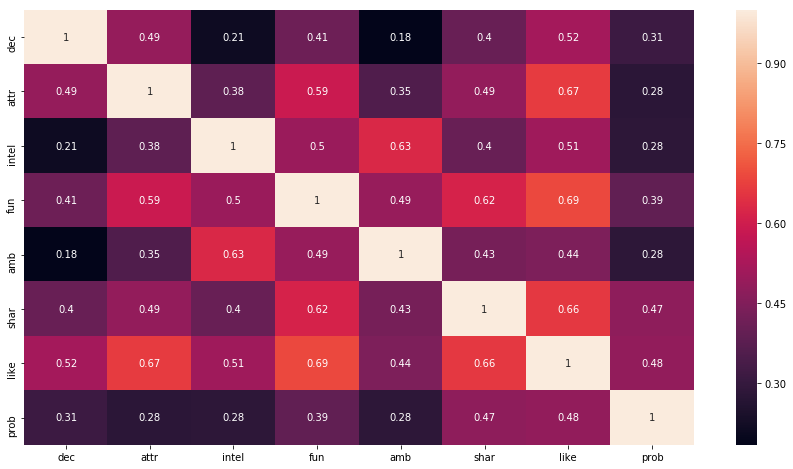

In [482]:
plt.figure(figsize=(15,8))
sns.heatmap(training.corr(), annot=True)

In [483]:
# plt.figure(figsize=(20,10))
# sns.pairplot(training)

In [496]:
label = training_features[0]
sc = StandardScaler()

X = training.drop(columns=label).values
X = sc.fit_transform(X)

y = training[label].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

### Dense NN

In [497]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer="RandomNormal",
                input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu', kernel_initializer="RandomNormal"))
model.add(Dense(1, activation='sigmoid'))

In [498]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [499]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_82 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 101       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [500]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
6274/6274 [==============================] - 3s 499us/step - loss: 0.5442 - acc: 0.7225
Epoch 2/10
6274/6274 [==============================] - 1s 98us/step - loss: 0.4824 - acc: 0.7600
Epoch 3/10
6274/6274 [==============================] - 1s 96us/step - loss: 0.4807 - acc: 0.7609
Epoch 4/10
6274/6274 [==============================] - 1s 97us/step - loss: 0.4800 - acc: 0.7617
Epoch 5/10
6274/6274 [==============================] - 1s 99us/step - loss: 0.4780 - acc: 0.7612
Epoch 6/10
6274/6274 [==============================] - 1s 100us/step - loss: 0.4786 - acc: 0.7617
Epoch 7/10
6274/6274 [==============================] - 1s 98us/step - loss: 0.4769 - acc: 0.7667
Epoch 8/10
6274/6274 [==============================] - 1s 102us/step - loss: 0.4768 - acc: 0.7646
Epoch 9/10
6274/6274 [==============================] - 1s 103us/step - loss: 0.4770 - acc: 0.7606
Epoch 10/10
6274/6274 [==============================] - 1s 100us/step - loss: 0.4761 - acc: 0.7657


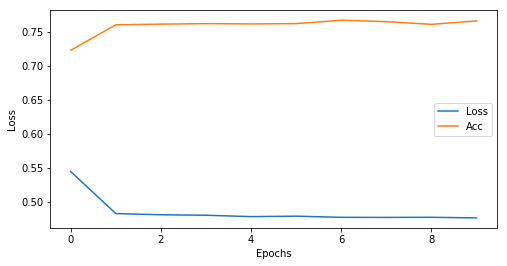

In [501]:
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Loss")
plt.plot(hist.history["acc"], label="Acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [502]:
y_pred = model.predict(X_test, batch_size=128)
print(y_pred[:5])

[[0.11699688]
 [0.02216431]
 [0.86809516]
 [0.02561998]
 [0.8547708 ]]


In [503]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc}, loss: {loss}")

698/698 [==============================] - 1s 1ms/step
Accuracy: 0.7836676221180782, loss: 0.4370521237822863


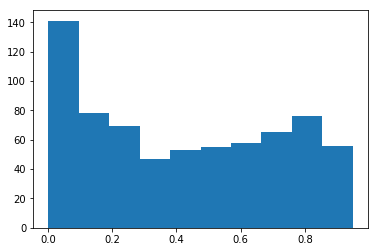

In [504]:
plt.hist(y_pred)
plt.show()

In [505]:
y = (y_pred > 0.45)

In [506]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y)
accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
print(cm)
print(accuracy)

[[303  78]
 [ 69 248]]
0.7893982808022922
